# Maleria Detection using CNN

In [ ]:
# ML Life Cycle -
# 1. Task
# 2. Data
# 3. Modeling
# 4. Error Measurement
# 5. Training and Optimization
# 6. Performance MeasureMent
# 7. Validating and testing
# 8. Corrective Measures

# Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Libraries

In [ ]:
# https://www.tensorflow.org/datasets/catalog/malaria
import tensorflow as tf
# array and metrics functionalities
import numpy as np
# image
import cv2
# visualization
import matplotlib.pyplot as plt
# tensorflow dataest loading
import tensorflow_datasets as tfds

import tensorflow_probability as tfp

# model layers
from tensorflow.keras.layers import Normalization, InputLayer, BatchNormalization,Conv2D, MaxPool2D, Dense, Flatten, Resizing, Rescaling, Input, Layer, Dropout

# image augmentation functionalities from layers
from tensorflow.keras.layers import RandomFlip, RandomRotation

# weight optimization
from tensorflow.keras.optimizers import Adam

# loss measurement
from tensorflow.keras.losses import BinaryCrossentropy

from tensorflow.keras.models import Model

# measurement metrcics
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC, binary_accuracy

import sklearn
import datetime
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# callback functionalities
from tensorflow.keras.callbacks import Callback, CSVLogger, LearningRateScheduler

# regularization
from tensorflow.keras.regularizers import L2

# hyperparameter tuning
from tensorboard.plugins.hparams import api as hp


# Import the dataset

In [ ]:
# https://www.tensorflow.org/datasets/api_docs/python/tfds/load
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised = True, shuffle_files = True, split = ['train'])

# Split data into train test validation set

In [ ]:
# data = tf.data.Dataset.range(10)
# print(list(data.as_numpy_iterator()))
# #data = data.skip(3) # skip first three values
# data = data.take(7)# take first 7 values
# print(list(data.as_numpy_iterator()))

In [ ]:
# TRAIN_RATIO = 0.6
# VALIDATION_RATIO = 0.2
# TEST_RATIO = 0.2
# data = tf.data.Dataset.range(10)
# DATASET_SIZE = len(data)
# print(list(data.as_numpy_iterator()))
# #data = data.skip(3) # skip first three values
# train_data = data.take(int(TRAIN_RATIO*DATASET_SIZE))# take first 0.6 percnt data
# print(list(train_data.as_numpy_iterator()))

# val_test_data = data.skip(int(TRAIN_RATIO*DATASET_SIZE)) # skipping first 0.6 percent data
# val_data = val_test_data.take(int(VALIDATION_RATIO*DATASET_SIZE)) # from the leftover 0.4 data
# print(list(val_data.as_numpy_iterator()))

# # test_data = data.skip(int((TRAIN_RATIO+VALIDATION_RATIO)*DATASET_SIZE)) # skipping 0.6 + 0.2 data
# test_data = val_test_data.skip(int(VALIDATION_RATIO*DATASET_SIZE)) # skipping 0.6 + 0.2 data
# print(list(test_data.as_numpy_iterator()))

In [ ]:
def splits(dataset,TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)
  train_data = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))# take first 0.8 percnt data
  val_test_data = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE)) # skipping first 0.8 percent data
  val_data = val_test_data.take(int(VAL_RATIO*DATASET_SIZE)) # from the leftover 0.2 data take 0.1
  test_data = val_test_data.skip(int(VAL_RATIO*DATASET_SIZE)) # skipping 0.1 from 0.2 data
  return train_data, val_data, test_data

In [ ]:
# for i in dataset[0].take(4):
#   print(i)#dataset['train']

In [ ]:
TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.1
TEST_RATIO = 0.1
#data = tf.data.Dataset.range(10)
# DATASET_SIZE = len(data)
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VALIDATION_RATIO, TEST_RATIO)
# print(list(train_dataset.take(1).as_numpy_iterator()))
# print("\n\nend\n\n")
# print(list(val_dataset.take(1).as_numpy_iterator()))
# print("\n\nend\n\n")
# print(list(test_dataset.take(1).as_numpy_iterator()))

In [ ]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

# Data Visualization

In [ ]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  # plt.title(int(label))
  plt.title(dataset_info.features['label'].int2str(label))
  plt.imshow(image)
  plt.axis('off')

In [ ]:
dataset_info

# Data processing
- resize image (fixed width and height) [224 x 224]
- Normalization (all the data should be in given range)

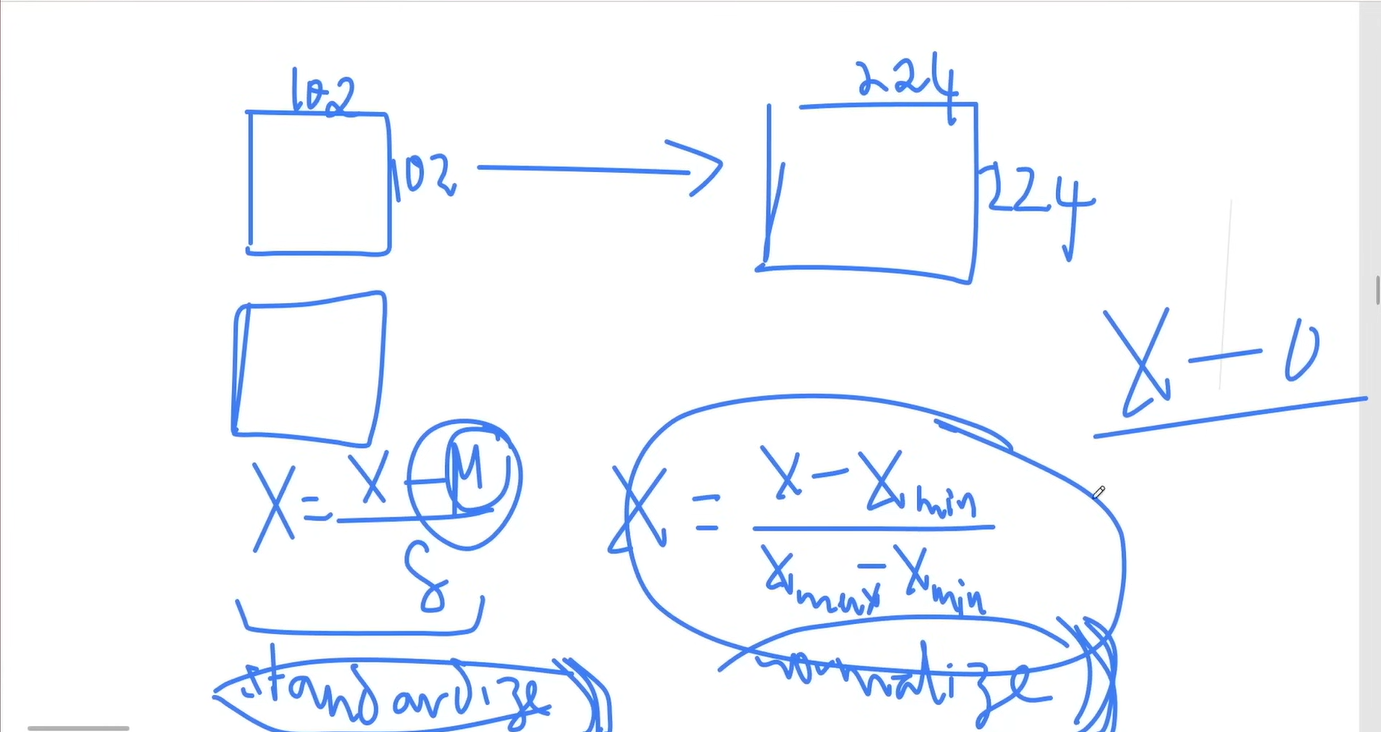

In [ ]:
# if pixel values are around the mean value - standardized
# if pixel values are different from one another - normalized

In [ ]:
# IMG_SIZE = 224
# def resize_rescale_image(image, label):
#   return tf.image.resize(
#     image,
#     (IMG_SIZE, IMG_SIZE),
#     # method=ResizeMethod.BILINEAR,
#     # preserve_aspect_ratio=False,
#     # antialias=False,
#     # name=None
# )/255.0, label


### After image modification  with image API from tensorflow
- resize image before image modification
- after shuffeling, map the augment function

In [ ]:
IMG_SIZE = 224
def resize_rescale(image, label):
    return tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255, label

# Auto resize and rescaling instead of function calling
# resize_rescale_layers = tf.keras.Sequential([
#     Resizing(IMG_SIZE, IMG_SIZE),
#     Rescaling(1./255)
# ])

# def augment(image, label):
#   # resize before doing the augmentation
#   image, label = resize_rescale(image, label)

#   # now augment
#   image = tf.image.rot90(image)
#   image = tf.image.adjust_brightness(image, delta = -.4)
#   image = tf.image.random_flip_left_right(image)
#   return image, label

In [ ]:
train_dataset

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/image/resize
# train_dataset = train_dataset.map(resize_rescale)
# val_dataset = val_dataset.map(resize_rescale)
# # no need for test set
# test_dataset = test_dataset.map(resize_rescale)

In [ ]:
print(train_dataset)
print(val_dataset)
print(test_dataset)
# <_MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
# for image, label in train_dataset.take(1):
#   print(image, label)

In [ ]:
# for i, (image, label) in enumerate(test_dataset.take(16)):
#   ax = plt.subplot(4,4,i+1)
#   # plt.title(int(label))
#   plt.title(dataset_info.features['label'].int2str(label))
#   plt.imshow(image)
#   plt.axis('off')

In [ ]:
BATCH_SIZE = 32
# shuffle the data, put into batch, prefetch
train_dataset = (
              train_dataset.
              shuffle(buffer_size = 8, reshuffle_each_iteration = True)
              .map(resize_rescale) # maping after the shuffeling
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE)
              )

val_dataset = (
          val_dataset
          .shuffle(buffer_size = 8,reshuffle_each_iteration=True)
          .map(resize_rescale)# maping after the shuffeling, no image modification here, cause we are validating our model.
          .batch(BATCH_SIZE)
          .prefetch(tf.data.AUTOTUNE)
          )

# no need for test dataest
# test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(resize_rescale)

In [ ]:
# check if the train, val and test datas shape is same or not
print(train_dataset)
print(val_dataset)
print(test_dataset)

In [ ]:
# kernel - filtering the inputs.
# reducing the kernel size, permits extracts more(complex) features(information) from the inputs.
# larger kernel, helps to extract larger input features.
# padding - corner pixels have the influence on our output features.

# more output (more dimension) - more extracted information

# Resources to uderstand CNN
- W0 - weight matrix output
- Wi - weight matrix input
- F - Filter Size
- P - Padding
- S - Stride

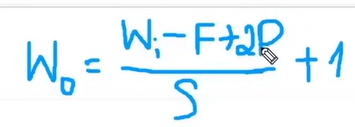

## Explaining resources for different topics:
[CNN explained](https://poloclub.github.io/cnn-explainer/)


 [image kernels](https://setosa.io/ev/image-kernels/)



[lenet alexnet algo](https://en.wikipedia.org/wiki/LeNet)



https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html

[convollution animation (padding, stride, transposed)](https://github.com/vdumoulin/conv_arithmetic)


## Convolutional Neural Net

6x(5x5x3) + 6 = 456,
16 x (5x5x6) + 16 = 2416

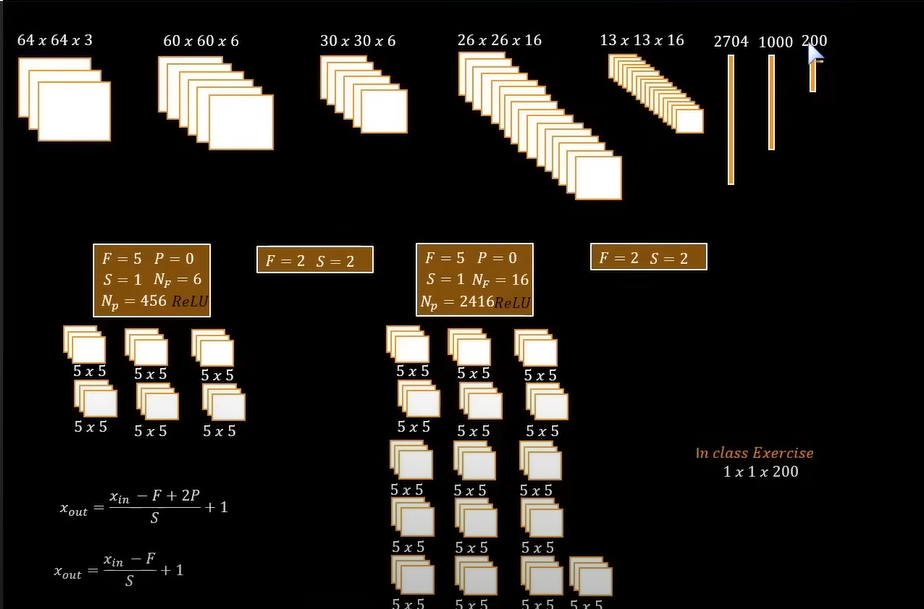

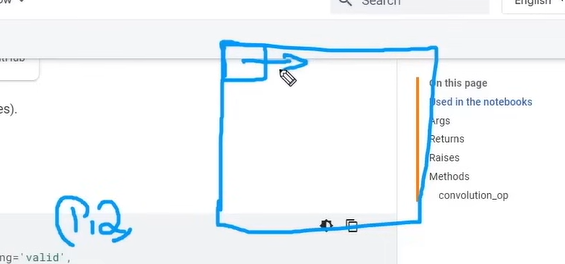

# Build the models (CNN), initialy Sequential

In [ ]:
# build layres using: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# filters - Nf
# kernel_size correspond to filter size
# strides (1,2) -> horizontal direction 1 steps, vertical direction 2 steps

In [ ]:
IMG_SIZE = 224
droupout_rate = 0.3
regularization_rate = 0.01
model = tf.keras.Sequential([
  InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),
  Dropout(droupout_rate), #

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Flatten(),

  Dense(1000, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dropout(droupout_rate),
  Dense(10, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dense(1, activation = "sigmoid"),# binary classification



])

model.summary()


# Model Training and Error Measurements
-  Binary Cross Entropy Loss

[Loss Function](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

In [ ]:
# Example 1: (batch_size = 1, number of samples = 4)
y_true = [0, 1, 0, 0]
y_pred = [-18.6, 0.51, 2.94, 1.0]
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True) # True - output fall in the range 0 and 1
bce(y_true, y_pred)

In [ ]:
model.compile(optimizer= Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = ['accuracy']
            )

In [ ]:
model.summary()

# Training Covnets

In [ ]:
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset, verbose = 1)

In [ ]:
train_dataset

In [ ]:
val_dataset

### Visualization using tensorboard callblock

- first run TensorBoard Callback section

In [ ]:
CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
METRIC_DIR = './logs/' + CURRENT_TIME + '/metrics'
train_writer = tf.summary.create_file_writer(METRIC_DIR)

In [ ]:
LOG_DIR = "./logs/"+ CURRENT_TIME
print(LOG_DIR)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

In [ ]:
%load_ext tensorboard

In [ ]:
tensorboard --logdir='./logs'

### plot the metrices

[History](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)

In [ ]:
history.history.items()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper right')
plt.show()

# Model evaluation and testing

In [ ]:
#
test_dataset = test_dataset.batch(1)

In [ ]:
test_dataset

In [ ]:
model.evaluate(test_dataset)

In [ ]:
def result_of_prediction(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

In [ ]:
result_of_prediction(model.predict(test_dataset.take(1))[0][0])

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3, 3, i+1)
  plt.imshow(image[0])

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3, 3, i+1)
  plt.imshow(image[0])
  res_of_pred = result_of_prediction(model.predict(image)[0][0])
  org_res = result_of_prediction(label.numpy()[0])
  # print(res_of_pred)
  # print(org_res)
  # total = 9
  # correct = 0
  # incorrect = 0
  # if res_of_pred == org_res:
  #   correct += 1
  # else:
  #   incorrect += 1
  plt.title(str(org_res) + ' : ' + str(res_of_pred))
  plt.axis('off')
  # plt.legend([(correct/total)*100, (incorrect/total)*100])

# Save and load the model

In [ ]:
# filepath = "/content/drive/MyDrive/models"
model.save('/content/drive/MyDrive/models/maleria_cell_detection_01.keras')

In [ ]:
model.save('/content/drive/MyDrive/models/maleria_cell_detection_01.hdf5')
model.save('/content/drive/MyDrive/models/maleria_cell_detection_01.h5')

In [ ]:
loded_model = tf.keras.models.load_model('/content/drive/MyDrive/models/maleria_cell_detection_01.keras')
loded_model.summary()

In [ ]:
model.save_weights('/content/drive/MyDrive/models/maleria_cell_detection_01_weights.weights.h5')


# Different method for building models
- Sequential API
- Functional API
- building collable models
- model subclassing
- building own custome layers

- 1 input (image) ---- 2 output (perasitic/ uninfected), (position of the infection). For this, we need functional api (can build more complex model for example: ResNet)


## Functional API - we could use shared layers

[Function API](https://www.tensorflow.org/guide/keras/functional_api)

### feature extraction in seperate

In [ ]:
func_input = Input(shape = (IMG_SIZE, IMG_SIZE, 3), name="input image")
################################feature extraction unit#########################################
x = Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides = 2)(x)

x = Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid')(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size = 2, strides = 2)(x)


feature_extrector_model = Model(func_input, output, name="feature_extractor")
feature_extrector_model.summary()

### instead of functional api , we could also take sequential api as a seperate input for the classification part.

In [ ]:
feature_extractor_seq_model = tf.keras.Sequential([
    InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  #   Conv2D(
  #   filters=6,
  #   kernel_size=5,
  #   strides=1,
  #   padding='valid',
  #   # data_format=None,
  #   # dilation_rate=(1, 1),
  #   # groups=1,
  #   activation='sigmoid',
  #   # use_bias=True,
  #   # kernel_initializer='glorot_uniform',
  #   # bias_initializer='zeros',
  #   # kernel_regularizer=None,
  #   # bias_regularizer=None,
  #   # activity_regularizer=None,
  #   # kernel_constraint=None,
  #   # bias_constraint=None,
  #   # **kwargs
  # ),
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid'),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid'),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),


])

feature_extractor_seq_model.summary()

### classification part in seperate

In [ ]:
func_input = Input(shape = (IMG_SIZE, IMG_SIZE, 3), name="input image")

x = feature_extractor_seq_model(func_input)
x = Flatten()(x)
################## Correctly classify the image ##############################
x = Dense(1000, activation = "relu")(x)
x = BatchNormalization()(x)
x = Dense(10, activation = "relu")(x)
x = BatchNormalization()(x)
################################################################################

func_output = Dense(1, activation="sigmoid")(x)

model_func = Model(func_input, func_output, name="model")
model_func.summary()

In [ ]:
# func_input = Input(shape = (IMG_SIZE, IMG_SIZE, 3), name="input image")
# ################################feature extraction unit#########################################
# x = Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid')(func_input)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size = 2, strides = 2)(x)

# x = Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size = 2, strides = 2)(x)
# ##############################################################################
# x = Flatten()(x)

# ################## Correctly classify the image ##############################
# x = Dense(1000, activation = "relu")(x)
# x = BatchNormalization()(x)
# x = Dense(10, activation = "relu")(x)
# x = BatchNormalization()(x)
# #x = Dense(1, activation = "sigmoid")(x)
# ################################################################################

# func_output = Dense(1, activation="sigmoid")(x)

# model = Model(func_input, func_output, name="model")
# model.summary()

## [Model subclassing](https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing)


In [ ]:
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    super(FeatureExtractor, self).__init__()

    #self.input_laser = InputLayer(shape= (224, 224, 3)),
    self.conv_1 = Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, activation = activation, padding = padding)
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size, strides = 2*strides)

    self.conv_2 = Conv2D(filters = filters*2, kernel_size = kernel_size, strides = strides, activation = activation, padding = padding)
    self.batch_2 =  BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size, strides = 2*strides)

  # def build(self, shape):
  #   x = tf.zeros(shape)
  #   self.call(x)


  def call(self, x):
    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x

#feature_sub_classed = FeatureExtractor(8, 3, 1, "valid", "relu", 2)
#feature_sub_classed.summary()

class ClassificationModel(Model):
  def __init__(self):
    super(ClassificationModel, self).__init__()

    self.feature_extractor = FeatureExtractor(8, 3, 1, "valid", "relu", 2)
    self.flatten = Flatten()

    self.dense_1 = Dense(1000, activation = "relu")
    self.batch_1 = BatchNormalization()

    self.dense_2 = Dense(10, activation = "relu")
    self.batch_2 = BatchNormalization()

    self.dense_3 = Dense(1, activation="sigmoid")

  # def build(self, shape):
  #   x = tf.zeros(shape)
  #   self.call(x)

  def call(self, x):
    x = self.feature_extractor(x)
    x = self.flatten(x)

    x = self.dense_1(x)
    x = self.batch_1(x)

    x = self.dense_2(x)
    x = self.batch_2(x)

    x = self.dense_3(x)

    return x

#inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
model_sub_classed = ClassificationModel()
dummy_input = tf.zeros([1, 224, 224, 3])
model_sub_classed(dummy_input)#  providing the shape of initial value
model_sub_classed.summary()

In [ ]:
func_input = Input(shape = (IMG_SIZE, IMG_SIZE, 3), name="input image")

# created a class, feature_sub_classed is the object of that class
feature_sub_classed = FeatureExtractor(8, 3, 1, "valid", "relu", 2)
x = feature_sub_classed(func_input)
x = Flatten()(x)
################## Correctly classify the image ##############################
x = Dense(1000, activation = "relu")(x)
x = BatchNormalization()(x)
x = Dense(10, activation = "relu")(x)
x = BatchNormalization()(x)
################################################################################

func_output = Dense(1, activation="sigmoid")(x)

model_func = Model(func_input, func_output, name="model")
model_func.summary()




In [ ]:
model_sub_classed.compile(optimizer= Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = ['accuracy']
            )
history = model_sub_classed.fit(train_dataset, epochs = 3, validation_data = val_dataset, verbose = 1)

## [Custome Layers](https://www.tensorflow.org/tutorials/customization/custom_layers)


In [ ]:
class MyDenseLayer(Layer):
  def __init__(self, output_units, activation):
    super(MyDenseLayer, self).__init__()
    self.output_units = output_units
    self.activation = activation


  def build(self,input_features_shape):
    self.w = self.add_weight(shape=(input_features_shape[-1], self.output_units),initializer= "random_normal",trainable = True)
    self.b = self.add_weight(shape=(1, self.output_units),initializer= "random_normal", trainable = True)


  def call(self, input_features):
    pre_output = tf.matmul(input_features, self.w) + self.b

    if self.activation == "relu":
      return tf.nn.relu(pre_output)

    elif self.activation == "sigmoid":
        return tf.math.sigmoid(pre_output)

    else:
      return pre_output


#layer = MyDenseLayer(10)

In [ ]:
model_custome = tf.keras.Sequential([
  InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid'),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid'),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Flatten(),

  # adding custome dense layer
  MyDenseLayer(1000, activation = "relu"),
  BatchNormalization(),
  MyDenseLayer(10, activation = "relu"),
  BatchNormalization(),
  MyDenseLayer(1, activation = "sigmoid"),# binary classification



])

model_custome.summary()


# ROC and AUC

- receiver operatin characteristics (ROC) - choose the point which are better fit for our requiremnets, To maximize TP and minimize FP or maintaining a balance.

- Area Under The Curve (AUC) - how much freedom we have to play around with the threshold

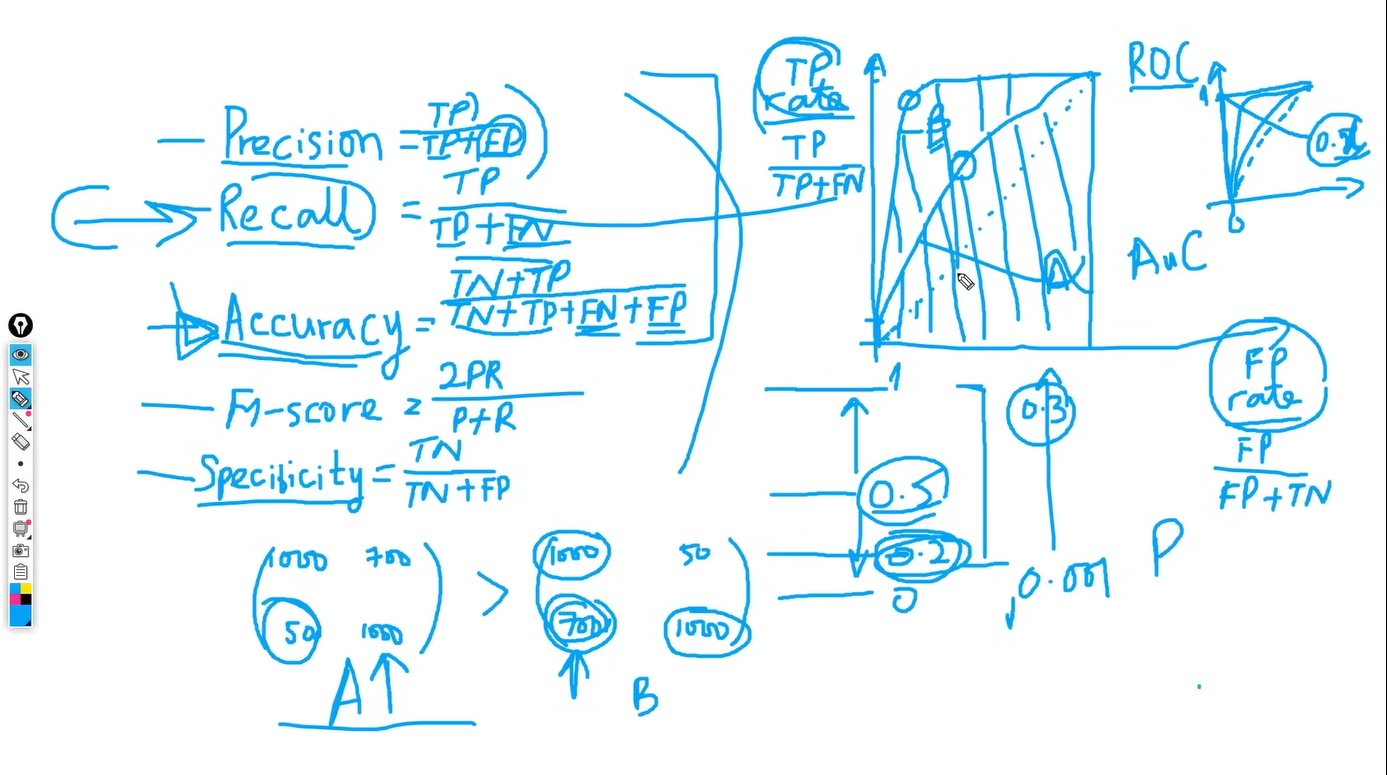

In [ ]:
metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]

In [ ]:
model.compile(optimizer= Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = metrics
            )
history = model.fit(train_dataset, epochs = 20, validation_data = val_dataset, verbose = 1)

## Evaluate the model

In [ ]:
test_dataset = test_dataset.batch(1)

In [ ]:
model_custome.evaluate(test_dataset)

## Confusion metrix, ROC plot

In [ ]:
labels = []
predicted = []
inp = []
for x, y in test_dataset.as_numpy_iterator():
  labels.append(y)
  inp.append(x)
print(labels)

In [ ]:
labels = np.array([i[0] for i in labels ])
labels

In [ ]:
print(np.array(inp).shape)

In [ ]:
print(np.array(inp)[:,0,...].shape) # chop off the batch, which mismatch the input shape

In [ ]:
predicted = model_custome.predict(np.array(inp)[:,0,...])
print(predicted[:,0].shape)

In [ ]:
print(labels.shape)

In [ ]:
threshold = 0.07 # manualy change the threshold to see the best model, which can reduce FP and increase the TP

cm = confusion_matrix(labels, predicted > threshold) # value > threshold [uninfected]
print(cm)
plt.figure(figsize = (8,8))


sns.heatmap(cm, annot = True,)
plt.title("confusion matrix - {}".format(threshold))
plt.ylabel('Actual')
plt.xlabel('Predicted')

# [TN  TP]
# []
# tp - 89.0,
# fp - 19.0,
# tn -  1378.0,
# fn -  1271.0

In [ ]:
# tp = 89.0,
# fp = 19.0,
fp, tp, thresholds = roc_curve(labels, predicted)
# print(len(fp), len(tp), len(thresholds))

plt.figure(figsize = (8,12))
plt.plot(fp, tp)
#plt.figure(figsize = (10,8))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)

# including the threshold
skip = 20
for i in range(0, len(thresholds), skip):
  plt.text(fp[i], tp[i], thresholds[i])
plt.show()

# CallBack

- Callbacks can be passed to keras methods such as fit(), evaluate(), and predict() in order to hook into the various stages of the model training, evaluation, and inference lifecycle.

## Log Image Callback

### tensorbord class inherit

In [ ]:
class LogImageCallbackTensorBord(Callback):
  def on_epoch_end(self, epoch, logs):
    labels = []
    predicted = []
    inp = []
    for x, y in test_dataset.as_numpy_iterator():
      labels.append(y)
      inp.append(x)
    labels = np.array([i[0] for i in labels ])
    predicted = model_custome.predict(np.array(inp)[:,0,...])

    threshold = 0.5 # manualy change the threshold to see the best model, which can reduce FP and increase the TP

    cm = confusion_matrix(labels, predicted > threshold) # value > threshold [uninfected]
    print(cm)
    plt.figure(figsize = (8,8))


    sns.heatmap(cm, annot = True,)
    plt.title("confusion matrix - {}".format(threshold))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.axis('off')

    # save this image into the buffer
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image = tf.image.decode_png(buffer.getvalue(), channels=3)
    #image = tf.expand_dims(image, 0)

    CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
    IMG_DIR = './logs/' + CURRENT_TIME + '/image'


    image_writer = tf.summary.create_file_writer(IMG_DIR)

    with image_writer.as_default():
      tf.summary.image('Confusion Matric', image, step = epoch)





In [ ]:
test_dataset = test_dataset.batch(1)

### WANDB callback
- Log (matrices)
- Log (metric values)
- Log (Images) https://docs.wandb.ai/guides/track/log/media/

- https://docs.wandb.ai/guides/track/log/plots/
- https://github.com/wandb/wandb/tree/main/wandb/plot (github repo)
- custom charts using matplotlib

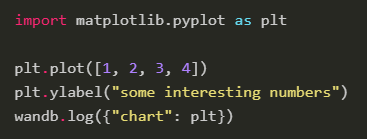

- LOG metrics and metric values

In [ ]:
class LogImageCallbackWandBplot(Callback):
  def on_epoch_end(self, epoch, logs):
    labels = []
    predicted = []
    inp = []
    for x, y in test_dataset.as_numpy_iterator():
      labels.append(y)
      inp.append(x)
    labels = np.array([i[0] for i in labels ])
    predicted = model_custome.predict(np.array(inp)[:,0,...])

    threshold = 0.5 # manualy change the threshold to see the best model, which can reduce FP and increase the TP
    pred = []
    for i in range(len(predicted)):
    if predicted[i] < 0.5:
      pred.append([1,0])
    else:
      pred.append([0,1])

    pred = np.array(pred)
    #print(pred)
    # cm = confusion_matrix(labels, predicted > threshold) # value > threshold [uninfected]
    # print(cm)
    # plt.figure(figsize = (8,8))


    # sns.heatmap(cm, annot = True,)
    # plt.title("confusion matrix - {}".format(threshold))
    # plt.ylabel('Actual')
    # plt.xlabel('Predicted')
    # plt.axis('off')

    # # save this image into the buffer
    # buffer = io.BytesIO()
    # plt.savefig(buffer, format='png')
    # buffer.seek(0)
    # image = tf.image.decode_png(buffer.getvalue(), channels=3)
    # #image = tf.expand_dims(image, 0)

    # CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
    # IMG_DIR = './logs/' + CURRENT_TIME + '/image'


    # image_writer = tf.summary.create_file_writer(IMG_DIR)

    # with image_writer.as_default():
    #   tf.summary.image('Confusion Matric', image, step = epoch)
    # wandb.log({"Confusion Matrix" : wandb.plot.confusion_matrix(probs = None,
    #                                                     y_true = labels,
    #                                                     preds = pred,
    #                                                     class_names = ['Parasitized', 'Uninfected'])})
    # https://github.com/wandb/wandb/blob/main/wandb/plot/roc_curve.py
    wandb.log({"ROC-CURVE" : wandb.plot.roc_curve(#probs = None,
                                                        y_true = labels,
                                                        y_probas = pred,
                                                       labels = ['Parasitized', 'Uninfected'])})
    wandb.log({'loss': logs['loss']}) # log value comes from the metrics, model.compile()




- [LOG image](https://docs.wandb.ai/guides/track/log/media/)

In [ ]:
class LogImageCallbackWandB(Callback):
  def on_epoch_end(self, epoch, logs):
    labels = []
    predicted = []
    inp = []
    for x, y in test_dataset.as_numpy_iterator():
      labels.append(y)
      inp.append(x)
    labels = np.array([i[0] for i in labels ])
    predicted = model_custome.predict(np.array(inp)[:,0,...])

    threshold = 0.5 # manualy change the threshold to see the best model, which can reduce FP and increase the TP

    cm = confusion_matrix(labels, predicted > threshold) # value > threshold [uninfected]
    print(cm)
    plt.figure(figsize = (8,8))


    sns.heatmap(cm, annot = True,)
    plt.title("confusion matrix - {}".format(threshold))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.axis('off')

    # save this image into the buffer
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image_array = tf.image.decode_png(buffer.getvalue(), channels=3)
    # image = tf.expand_dims(image, 0)

    # CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
    # IMG_DIR = './logs/' + CURRENT_TIME + '/image'


    # image_writer = tf.summary.create_file_writer(IMG_DIR)

    # with image_writer.as_default():
    #   tf.summary.image('Confusion Matric', image, step = epoch)

    images = wandb.Image(image_array, caption="Confusion Metrix for epoch {}".format(epoch))

    wandb.log({"Confusion Matrix": images})





- modifyinf the original prediction for better visualization

In [ ]:
labels = []
predicted = []
inp = []
for x, y in test_dataset.as_numpy_iterator():
  labels.append(y)
  inp.append(x)
  labels = np.array([i[0] for i in labels ])
  predicted = model_custome.predict(np.array(inp)[:,0,...])

In [ ]:
pred = []

for i in range(len(predicted)):
  if predicted[i] < 0.5:
    pred.append([1,0])
  else:
    pred.append([0,1])
print(pred)


## TensorBoard Callback

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

In [ ]:
history = model.fit(train_dataset, epochs = 3, validation_data = val_dataset, verbose = 1, callbacks=[tensorboard_callback,lr_scheduler_callback]) # first run the tensorboard_callback , lr_scheduler_callback

[CallBack Attributes](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback#attributes)

In [ ]:
class LossCallback(Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nEpoch Number {} the model has loss of {}".format(epoch, logs["loss"]))

  def on_batch_end(self, batch, logs):
        print("Batch Number {} the model has loss of {}".format(batch, logs["loss"]))


## [csvlogger](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger)




In [ ]:
# for the first time training, append = False
# for redoing the training process again,  append = True, otherwise it will erase the previous important values.
csv_callback = tf.keras.callbacks.CSVLogger(
    "logs.csv", separator=',', append=False
)

## [Early Stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)



In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2, # 2 successive increase of loss
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

## Learning Rate Schedular

- [set didfferent learning rate for different epoch]( https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)

- [different LR Scheduling techniques (just have to change the scheduler method)](
https://mxnet.apache.org/versions/1.9.1/api/python/docs/tutorials/packages/gluon/training/learning_rates/learning_rate_schedules_advanced.html)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 1:
        learning_rate =  float(lr)
    else:
        learning_rate =  float(lr * tf.math.exp(-0.1))
        learning_rate = learning_rate.numpy()
    # first run Visualization using tensorboard callblock to set the directory -  (METRIC_DIR)
    with train_writer.as_default():
      tf.summary.scalar('Learning Rate', data = learning_rate, step = epoch)
    return learning_rate

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(
    scheduler, verbose=1
)

#scheduler_callback = LearningRateScheduler

## [ModelCheckpoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger)

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'checkpoint.keras',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    #initial_value_threshold=None
)

## [ReduceLearningRateOnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger)

In [ ]:
plateau_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=2,
    verbose=0,
)

## model training

In [ ]:
model_sub_classed.compile(optimizer= Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = ['accuracy']
            )
# loss = Loss
history = model_sub_classed.fit(train_dataset, epochs = 2, validation_data = val_dataset, verbose = 1, callbacks=[plateau_callback]) #LossCallback(),csv_callback

# New section

# Combating Overfitting and Underfitting

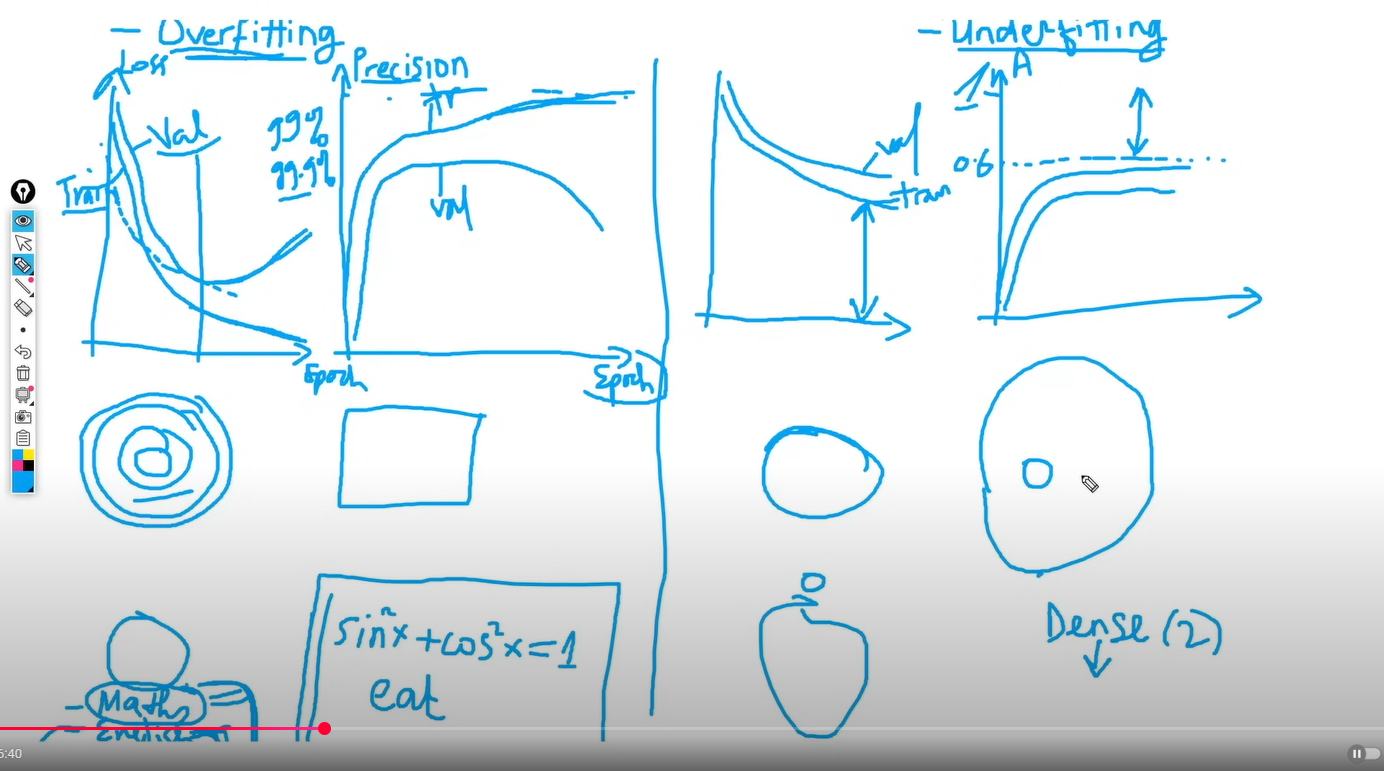

- [using image](https://www.tensorflow.org/api_docs/python/tf/image)

- [using layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomCrop)

## Data Augmentation

### Build custom keras layers for data augmentation

- converting the augemntation function into a layer

In [ ]:
class RotNinety(Layer):
  def __init__(self):
    super().__init__()

  @tf.function
  def call(self, image):
    return tf.image.rot90(image)

In [ ]:
# augment_layers = tf.keras.Sequential([
#     #RandomRotation(factor = (0.25, 0.2501)),
#     RotNinety(), # custome augmentation layer
#     RandomFlip(mode = "horizontal")
# ])

### one image random multiple augmentation

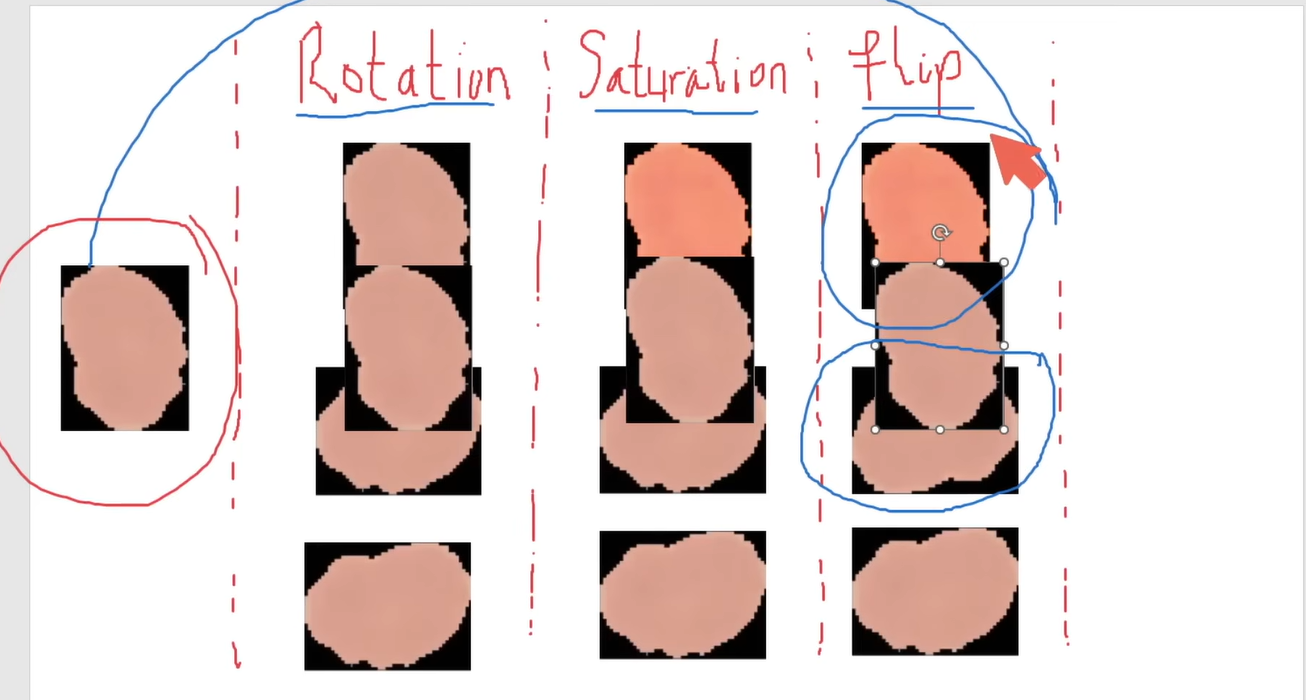

### Demo of eager and graph mode

- trace one by one, no repeat once printed

In [ ]:
IMG_SIZE = 224
original_image, label = next(iter(train_dataset))

@tf.function # automatically trun into graph mode
def resize_rescale(image, label):
  print("I was here")
  # tf.print("I was here") # normal print
  return tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255, label

_,_ = resize_rescale(original_image, label)
_,_ = resize_rescale(original_image, label)
_,_ = resize_rescale(original_image, label)

#### graph mode

In [ ]:
tf.config.run_functions_eagerly(True)
_,_ = resize_rescale(original_image, label)
_,_ = resize_rescale(original_image, label)
_,_ = resize_rescale(original_image, label)

#### eager mode

In [ ]:
tf.config.run_functions_eagerly(False)
_,_ = resize_rescale(original_image, label)
_,_ = resize_rescale(original_image, label)
_,_ = resize_rescale(original_image, label)

In [ ]:
IMG_SIZE = 224
original_image, label = next(iter(train_dataset))

@tf.function # automatically trun into graph mode
def resize_rescale(image, label):
  return tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255, label

In [ ]:

@tf.function
def augment(image, label):
  image, label = resize_rescale(image, label)
  image = tf.image.rot90(image, k = tf.random.uniform(shape = (), minval = 0, maxval = 4, dtype = tf.int32))
  #image = tf.image.adjust_brightness(image, delta = -.4)
  image = tf.image.stateless_random_saturation(image, 0.3, 0.5)
  image = tf.image.stateless_random_flip_left_right(image)
  return image, label


### Augmentation using tf.image

In [ ]:
def visualize(original, augmented):
  plt.subplot(1,2,1)
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.imshow(augmented)

In [ ]:
def data_uninfected(dataset):
  for image, label in dataset.shuffle(buffer_size =8).take(20):
    if label == 1:
      return image, label


In [ ]:
def data_infected(dataset):
  for image, label in dataset.shuffle(buffer_size =8).take(20):
    if label == 0:
      return image, label

In [ ]:
image_1, label_1 = data_uninfected(train_dataset)
print(label_1)
image_0, label_0 = data_infected(train_dataset)
print(label_0)

In [ ]:
# image_0, label_0 = next(iter(train_dataset))
# print(label)

In [ ]:
# image_1, label_1 = next(iter(train_dataset))
# print(label)

In [ ]:
augmented_image_0= tf.image.flip_left_right(image_0)
visualize(image_0, augmented_image_0)

In [ ]:
augmented_image_1= tf.image.flip_left_right(image_1)
visualize(image_1, augmented_image_1)

In [ ]:
augmented_image_0 = tf.image.random_flip_up_down(image_0)
visualize(image_0, augmented_image_0)

In [ ]:
augmented_image_0 = tf.image.rot90(image_0)
visualize(image_0, augmented_image_0)

# augmented_image_1 = tf.image.rot90(image_1)
# visualize(image_1, augmented_image_1)

In [ ]:
augmented_image_0 = tf.image.adjust_brightness(image_0, delta = -.4) # -1 to 1
visualize(image_0, augmented_image_0)

In [ ]:
augmented_image_1 = tf.image.random_saturation(image_1, lower = 1, upper = 10) # -1 to 1
visualize(image_1, augmented_image_1)

In [ ]:
augmented_image_0 = tf.image.random_saturation(image_0, lower = 1, upper = 10) # -1 to 1
visualize(image_0, augmented_image_0)

In [ ]:
augmented_image_0 = tf.image.central_crop(image_0, 0.5) # -1 to 1
visualize(image_0, augmented_image_0)

In [ ]:
mylist = [4,7,10]
item = next(iter(mylist))
print(item)

In [ ]:
IMG_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255, label

In [ ]:
def augment(image, label):
  # resize before doing the augmentation
  image, label = resize_rescale(image, label)

  # now augment
  image = tf.image.rot90(image)
  image = tf.image.adjust_brightness(image, delta = -.4)
  image = tf.image.random_flip_left_right(image)
  return image, label

- To see the original and modified image side by side

In [ ]:
plt.figure(figsize = (8,16))
for i, (image, label) in enumerate(train_dataset.take(8)):
  ax = plt.subplot(8, 2, 2*i + 1)
  # plt.title(int(label))
  plt.title(dataset_info.features['label'].int2str(label))
  plt.imshow(image)
  plt.axis('off')

  ax = plt.subplot(8, 2, 2*i + 2)
  # plt.title(int(label))
  plt.title(dataset_info.features['label'].int2str(label))
  plt.imshow(tf.image.adjust_brightness(image, delta = -.4))
  plt.axis('off')

### Augmentation using tf.layers

In [ ]:
# tf.keras.layers.RandomFlip(
#     mode=HORIZONTAL_AND_VERTICAL, seed=None, **kwargs
# )
# tf.keras.layers.RandomRotation(
#     factor,
#     fill_mode='reflect',
#     interpolation='bilinear',
#     seed=None,
#     fill_value=0.0,
#     value_range=(0, 255),
#     data_format=None,
#     **kwargs
# )
IMG_SIZE = 224


# Auto resize and rescaling instead of function calling
resize_rescale_layers = tf.keras.Sequential([
    Resizing(IMG_SIZE, IMG_SIZE),
    Rescaling(1./255)
])

## Defining a augmentation layer
augment_layers = tf.keras.Sequential([
    # RandomRotation(factor = (0.25, 0.2501)),
    RotNinety(), # custome augmentation layer
    RandomFlip(mode = "horizontal")
])

@tf.function
def augment_layer(image, label):
  # image, label = resize_rescale(image, label)
  return augment_layers(resize_rescale_layers(image), training = True), label

In [ ]:
#BATCH_SIZE = 32
# shuffle the data, put into batch, prefetch
train_dataset = (
              train_dataset.
              shuffle(buffer_size = 8, reshuffle_each_iteration = True)
              #.map(augment_layer) # maping after the shuffeling, # No need if model already have this function
              .batch(1)
              .prefetch(tf.data.AUTOTUNE)
              )

In [ ]:
val_dataset = (
          val_dataset
          .shuffle(buffer_size = 8,reshuffle_each_iteration=True)
          # .map(lambda x, y:(resize_rescale_layers(x), y))# maping after the shuffeling, no image modification here, cause we are validating our model. # model already have this function
          .batch(1)
          .prefetch(tf.data.AUTOTUNE)
          )



In [ ]:
# no need for test dataest
# test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
# test_dataset = test_dataset.map(lambda x, y:(resize_rescale_layers(x), y)) # model already have this function

In [ ]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

- to automatically resize, rescall and augment inside the model. No need to do it seperately

In [ ]:
# IMG_SIZE = 224
droupout_rate = 0.3
regularization_rate = 0.01
model = tf.keras.Sequential([
  InputLayer(shape= (None, None, 3)),
  resize_rescale_layers,
  augment_layers,
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),
  Dropout(droupout_rate), #

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Flatten(),

  Dense(1000, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dropout(droupout_rate),
  Dense(10, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dense(1, activation = "sigmoid"),# binary classification



])

model.summary()


- graph mode [model run faster]
- eager model [easy to catch error]

In [ ]:
metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
model.compile(optimizer= Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = metrics,
              #run_eagerly = True
            )
history = model.fit(train_dataset, epochs = 3, validation_data = val_dataset, verbose = 1)

### now when we have passed the augment layer and resize layer inside the model. We can directly use this model to predict any image

In [ ]:
image = cv2.imread('image_name.jpeg')
print(image.shape)
image = tf.expand_dims(image, axis = 0) # adding the batch dimension
print(image.shape)


model.predict(image)

### Mixup Data Augmentation

- https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/Beta

- Beta Distribution

In [ ]:
lmbd = tfp.distributions.Beta(0.2, 0.2)
# print(lmbd.sample(1)[0].numpy())

lmbd = lmbd.sample(1)[0]

image_1 = cv2.resize(cv2.imread('/content/drive/MyDrive/cat.jpg'), (IMG_SIZE, IMG_SIZE))
image_2 = cv2.resize(cv2.imread('/content/drive/MyDrive/dog.jpg'),(IMG_SIZE, IMG_SIZE))

label_1 = 0
label_2 = 1

print(image_1.shape, image_2.shape)

image = lmbd * image_1 + (1-lmbd)*image_2
label = lmbd * label_1 + (1-lmbd)*label_2

print(image.shape, label)

plt.imshow(image/255)


In [ ]:
train_dataset_1 = (
              train_dataset.
              shuffle(buffer_size = 8, reshuffle_each_iteration = True)
              .map(resize_rescale)
              # #.map(augment_layer) # maping after the shuffeling, # No need if model already have this function
              # .batch(1)
              # .prefetch(tf.data.AUTOTUNE)
              )
train_dataset_2 = (
              train_dataset.
              shuffle(buffer_size = 8, reshuffle_each_iteration = True)
              .map(resize_rescale)
              # #.map(augment_layer) # maping after the shuffeling, # No need if model already have this function
              # .batch(1)
              # .prefetch(tf.data.AUTOTUNE)
              )

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [ ]:
mixed_dataset

In [ ]:
def mixup(train_dataset_1, train_dataset_2):
  (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

  lmbd = tfp.distributions.Beta(0.2, 0.2)
  # print(lmbd.sample(1)[0].numpy())

  lmbd = lmbd.sample(1)[0]

  #image_1 = cv2.resize(cv2.imread('/content/drive/MyDrive/cat.jpg'), (IMG_SIZE, IMG_SIZE))
  #image_2 = cv2.resize(cv2.imread('/content/drive/MyDrive/dog.jpg'),(IMG_SIZE, IMG_SIZE))

  #label_1 = 0
  #label_2 = 1

  #print(image_1.shape, image_2.shape)

  image = lmbd * image_1 + (1-lmbd)*image_2
  label = lmbd * tf.cast(label_1, dtype=tf.float32) + (1-lmbd)* tf.cast(label_1, dtype=tf.float32)

  # print(image.shape, label)

  # plt.imshow(image/255)
  return image, label

In [ ]:
BATCH_SIZE = 32
train_dataset = (
              mixed_dataset.
              shuffle(buffer_size = 8, reshuffle_each_iteration = True)
              .map(mixup) # maping after the shuffeling, # No need if model already have this function
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE)
              )

In [ ]:
train_dataset

In [ ]:
BATCH_SIZE = 32
val_dataset = (
              val_dataset.
              shuffle(buffer_size = 8, reshuffle_each_iteration = True)
              .map(resize_rescale) # maping after the shuffeling, # No need if model already have this function
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE)
              )

In [ ]:
val_dataset

In [ ]:
IMG_SIZE = 224
droupout_rate = 0.3
regularization_rate = 0.01
model = tf.keras.Sequential([
  InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),
  Dropout(droupout_rate), #

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Flatten(),

  Dense(1000, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dropout(droupout_rate),
  Dense(10, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dense(1, activation = "sigmoid"),# binary classification



])

model.summary()


In [ ]:
metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
model.compile(optimizer= Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = metrics,
              #run_eagerly = True
            )
history = model.fit(train_dataset, epochs = 3, validation_data = val_dataset, verbose = 1)

### CutMix Data Augmentation

- cut some part of one image and set it into another image

- https://www.tensorflow.org/api_docs/python/tf/image/crop_to_bounding_box

In [ ]:
plt.subplot(1, 3, 1)
image_1 = cv2.resize(cv2.imread('/content/drive/MyDrive/cat.jpg'), (IMG_SIZE, IMG_SIZE))
plt.imshow(image_1)

plt.subplot(1, 3, 2)
image_2 = cv2.resize(cv2.imread('/content/drive/MyDrive/dog.jpg'), (IMG_SIZE, IMG_SIZE))
plt.imshow(image_2)


plt.subplot(1, 3, 3)
image_3 = cv2.resize(cv2.imread('/content/drive/MyDrive/dog.jpg'), (IMG_SIZE, IMG_SIZE))
plt.imshow(tf.image.crop_to_bounding_box(
    image_2, 20, 100, 100, 98
))



- https://www.tensorflow.org/api_docs/python/tf/image/pad_to_bounding_box

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 7, 1)
image_1 = cv2.resize(cv2.imread('/content/drive/MyDrive/cat.jpg'), (IMG_SIZE, IMG_SIZE))
plt.imshow(image_1)

plt.subplot(1, 7, 2)
image_2 = cv2.resize(cv2.imread('/content/drive/MyDrive/dog.jpg'), (IMG_SIZE, IMG_SIZE))
plt.imshow(image_2)

plt.subplot(1, 7, 3)
#image_3 = cv2.resize(cv2.imread('/content/drive/MyDrive/dog.jpg'), (IMG_SIZE, IMG_SIZE))
crop = tf.image.crop_to_bounding_box(
    image_2, 40, 60, 100, 98
)
plt.imshow(crop)

plt.subplot(1, 7, 4)
#image_3 = cv2.resize(cv2.imread('/content/drive/MyDrive/dog.jpg'), (IMG_SIZE, IMG_SIZE))
image_4 = tf.image.pad_to_bounding_box(
    crop, offset_height=20, offset_width=100, target_height=IMG_SIZE, target_width=IMG_SIZE
)
plt.imshow(image_4)


plt.subplot(1, 7, 5)
image_4 = tf.image.pad_to_bounding_box(
    crop, offset_height=20, offset_width=100, target_height=IMG_SIZE, target_width=IMG_SIZE
)
plt.imshow(image_4 + image_1)

plt.subplot(1, 7, 6)
crop_cat = tf.image.crop_to_bounding_box(
    image_1, offset_height=20, offset_width=100, target_height=100, target_width=98
)
plt.imshow(crop_cat)

plt.subplot(1, 7, 7)
image_5 = tf.image.pad_to_bounding_box(
    crop_cat, offset_height=20, offset_width=100, target_height=IMG_SIZE, target_width=IMG_SIZE
)
plt.imshow(image_1 - image_5 + image_4)


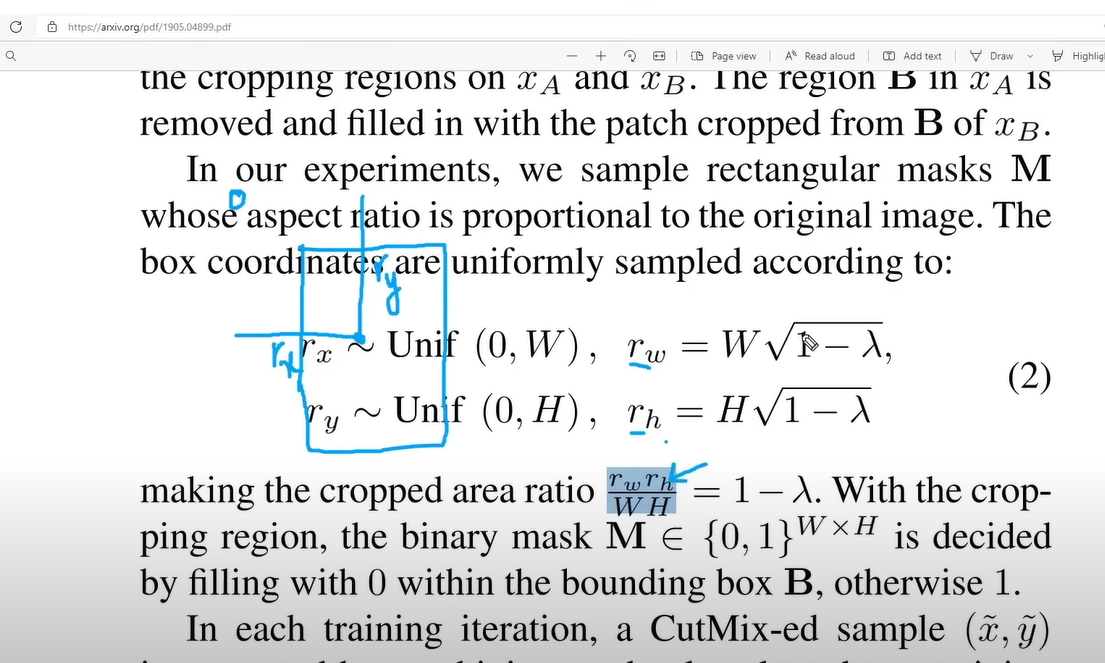

- https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/Uniform

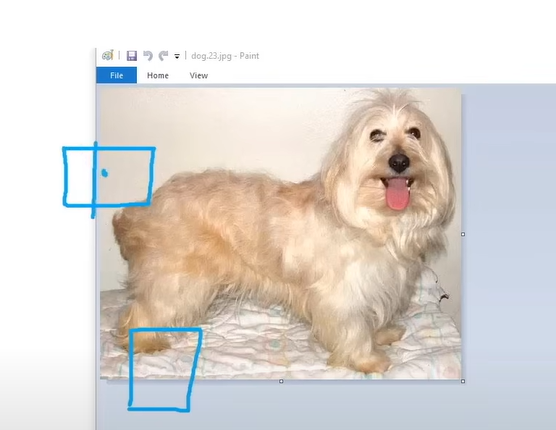

- tf.clip_by_value()

In [ ]:
def box(lambd):
  #lambd = tfp.distributions.Beta(0.2, 0.2)
  #lambd = lmbd.sample(1)[0]

  r_x = tf.cast(tfp.distributions.Uniform(low=0.0,high=IMG_SIZE).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(low=0.0,high=IMG_SIZE).sample(1)[0], dtype = tf.int32)



  r_w = tf.cast(IMG_SIZE*tf.math.sqrt(1-lmbd), dtype = tf.int32)
  r_h = tf.cast(IMG_SIZE*tf.math.sqrt(1-lmbd), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w//2, 0, IMG_SIZE) # clip function  for removing out of the image value
  r_y = tf.clip_by_value(r_y - r_h//2, 0, IMG_SIZE)


  x_b_r = tf.clip_by_value(r_x + r_w//2, 0, IMG_SIZE) # clip function  for removing out of the image value
  y_b_r = tf.clip_by_value(r_y + r_h//2, 0, IMG_SIZE)

  r_w = x_b_r - r_x
  if r_w == 0:
    r_w = 1
  r_h = y_b_r - r_y
  if r_h == 0:
    r_h = 1

  # print(r_x, r_y, r_w, r_h)
  # print(r_y.sample(1)[0])
  return r_y, r_x, r_h, r_w


In [ ]:
def cutmix(train_dataset_1, train_dataset_2):
  (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

  lambd = tfp.distributions.Beta(0.2, 0.2)
  lambd = lambd.sample(1)[0]

  r_y, r_x, r_h, r_w = box(lambd)
  # crop image from image_2
  crop_2 = tf.image.crop_to_bounding_box(
    image_2, r_y, r_x, r_h, r_w
  )
  # make an image from that croped image
  pad_2 = tf.image.pad_to_bounding_box(
    crop_2, offset_height=r_y, offset_width=r_x, target_height=IMG_SIZE, target_width=IMG_SIZE
  )

  # crop the part of this image to remove
  crop_1 = tf.image.crop_to_bounding_box(
      image_1, r_y, r_x, r_h, r_w
  )
  pad_1 = tf.image.pad_to_bounding_box(
      crop_1, offset_height=r_y, offset_width=r_x, target_height=IMG_SIZE, target_width=IMG_SIZE
  )
  image = image_1 - pad_1 + pad_2

  lambd = tf.cast(1 - (r_w * r_h) / (IMG_SIZE * IMG_SIZE), dtype = tf.float32)
  label = lambd * tf.cast(label_1, dtype = tf.float32) + (1 - lambd) * tf.cast(label_2, dtype = tf.float32)

  return image, label



In [ ]:
BATCH_SIZE = 32
train_dataset = (
              mixed_dataset.
              shuffle(buffer_size = 8, reshuffle_each_iteration = True)
              .map(cutmix)
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE)
              )

In [ ]:
train_dataset

In [ ]:
val_dataset

In [ ]:
image, label = next(iter(train_dataset))
plt.imshow(image[0])

In [ ]:
IMG_SIZE = 224
droupout_rate = 0.3
regularization_rate = 0.01
model = tf.keras.Sequential([
  InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),
  Dropout(droupout_rate), #

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Flatten(),

  Dense(1000, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dropout(droupout_rate),
  Dense(10, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dense(1, activation = "sigmoid"),# binary classification



])

model.summary()


In [ ]:
metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
model.compile(optimizer= Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = metrics,
              #run_eagerly = True
            )
history = model.fit(train_dataset, epochs = 3, validation_data = val_dataset, verbose = 1)

### Albumentations

In [ ]:
HorizontalFlip
RandomRotate90
VerticalFlip
RandomGridShuffle
RandomBrightnessContrast(brightness_limit=0.2,contrast_limit=0.2,brightness_by_max=False,p=1.0 )
Sharpen(alpha=(0.5, 1.0),method='gaussian',kernel_size=5,sigma=1.0,p=1.0)

In [ ]:
import albumentations as A

In [ ]:
print(A.__version__)

In [ ]:
# !pip install -U albumentations

In [ ]:
IMG_SIZE = 224
transforms = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.OneOf([A.HorizontalFlip(),A.VerticalFlip()], p = 0.3),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2,contrast_limit=0.2,brightness_by_max=False,p=1.0 ),
    A.Sharpen(alpha=(0.5, 1.0),method='gaussian',kernel_size=5,sigma=1.0,p=1.0),
    # A.CoarseDropout()
])

In [ ]:

def aug_albument(image):
  data = {"image": image} # create dic
  image = transforms(**data) # fit the data in the transforms pipeline
  image = image['image'] # take the image
  image = tf.cast(image/255., tf.float32) # normalize it
  return image

- [numpy function](https://www.tensorflow.org/api_docs/python/tf/numpy_function)

In [ ]:
def process_data(image, label):
  aug_img = tf.numpy_function(func=aug_albument, inp=[image], Tout=tf.float32)
  aug_img.set_shape((IMG_SIZE, IMG_SIZE, 3))
  return aug_img, label

In [ ]:
BATCH_SIZE = 32
# shuffle the data, put into batch, prefetch
train_dataset = (
              train_dataset.
              shuffle(buffer_size = 8, reshuffle_each_iteration = True)
              .map(process_data) # maping after the shuffeling
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE)
              )



# # no need for test dataest
# # test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
# test_dataset = test_dataset.map(resize_rescale)

In [ ]:
# train_dataset = train_dataset.map(resize_rescale)

In [ ]:
val_dataset = (
          val_dataset
          .shuffle(buffer_size = 8,reshuffle_each_iteration=True)
          .map(resize_rescale)# maping after the shuffeling, no image modification here, cause we are validating our model.
          .batch(BATCH_SIZE)
          .prefetch(tf.data.AUTOTUNE)
          )

In [ ]:
train_dataset

In [ ]:
val_dataset

In [ ]:
image, label= next(iter(train_dataset))
plt.imshow(image[0])

In [ ]:
plt.figure(figsize=(15, 15))

for i in range(1, 32):
  plt.subplot(8, 4, i)
  plt.title(label[i].numpy())
  plt.imshow(image[i])

In [ ]:
# # import tensorflow as tf
# # import albumentations as A
# # from albumentations.core.composition import OneOf
# # from albumentations.core.transforms_interface import ImageOnlyTransform
# # import numpy as np
# # import cv2

# # Define Albumentations augmentation pipeline
# def get_augmentation_pipeline():
#     return A.Compose([
#         A.HorizontalFlip(p=0.5),
#         A.RandomBrightnessContrast(p=0.2),
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
#         A.OneOf([
#             A.GaussianBlur(p=0.3),
#             A.MotionBlur(p=0.3),
#         ], p=0.5),
#         A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#     ])

# # Albumentations wrapper for TensorFlow
# def augment_image(image, label):
#     aug_pipeline = get_augmentation_pipeline()
#     # Convert TensorFlow tensor to NumPy array
#     image = image.numpy()
#     # Apply Albumentations augmentations
#     augmented = aug_pipeline(image=image)
#     augmented_image = augmented['image']
#     # Convert back to TensorFlow tensor
#     return tf.convert_to_tensor(augmented_image, dtype=tf.float32), label

# # Load a sample dataset (e.g., CIFAR-10)
# (x_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()

# # Normalize images to [0, 1]
# x_train = x_train.astype('float32') / 255.0

# # Create a TensorFlow dataset
# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# # Apply Albumentations augmentations using `tf.py_function`
# dataset = dataset.map(
#     lambda image, label: tf.py_function(
#         func=augment_image, inp=[image, label], Tout=(tf.float32, tf.int64)
#     ),
#     num_parallel_calls=tf.data.AUTOTUNE
# )

# # Batch and prefetch the dataset
# dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# # Example: Iterate through the dataset
# for images, labels in dataset.take(1):
#     print(images.shape, labels.shape)



In [ ]:
IMG_SIZE = 224
droupout_rate = 0.3
regularization_rate = 0.01
model = tf.keras.Sequential([
  InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),
  Dropout(droupout_rate), #

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Flatten(),

  Dense(1000, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dropout(droupout_rate),
  Dense(10, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dense(1, activation = "sigmoid"),# binary classification



])

model.summary()


## Custome BCE Loss

### Inherit keras Loss Class

In [ ]:
class CustomBCE(tf.keras.losses.Loss):
  def __init__(self, FACTOR):
    super(CustomBCE, self).__init__()
    self.FACTOR = FACTOR
  def call(self, y_true, y_pred):
    bce = BinaryCrossentropy()
    return bce(y_true, y_pred)* self.FACTOR


In [ ]:
FACTOR = 1
model.compile(optimizer= Adam(learning_rate = 0.1),
              loss = CustomBCE(FACTOR),
              metrics = metrics,
              #run_eagerly = True
            )

In [ ]:
# history = model.fit(train_dataset, validation_data=val_dataset, epochs = 3, verbose = 1)

- https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy

In [ ]:
metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]

### Loss (with parameter)

In [ ]:
FACTOR = 1
def custom_bce(FACTOR):
  def loss(y_true, y_pred):
    bce = BinaryCrossentropy()
    return bce(y_true, y_pred) * FACTOR
  return loss

### Loss (without parameter)

In [ ]:
def custom_bce(y_true, y_pred):
  bce = BinaryCrossentropy()
  return bce(y_true, y_pred)

## [Custom Metric](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger)

### custom metric class

In [ ]:
class CustomAccuracy(tf.keras.metrics.Metric):
  def __init__(self, name = 'Custom_Accuracy', FACTOR = 1):
    super(CustomAccuracy, self).__init__()
    self.FACTOR = FACTOR
    self.accuracy = self.add_weight(name = name, initializer = 'zeros') # comes with the keras Metric

  # update the metric state
  def update_state(self, y_true, y_pred, sample_weight = None):
    output = binary_accuracy(tf.cast(y_true, dtype = tf.float32), y_pred)*self.FACTOR
    #print(output)
    #print(len(output))
    # tf.math.count_nonzero(output, dtype = tf.float32)/tf.cast(len(output), dtype = tf.float32) # accuracy calculation
    self.accuracy.assign(tf.math.count_nonzero(output, dtype = tf.float32)/tf.cast(len(output), dtype = tf.float32))

  def result(self):
    return self.accuracy
  #
  def reset_states(self):
    self.accuracy.assign(0.)

### Metric (Without parameter)

In [ ]:
def custom_accuracy(y_true, y_pred):
  print(binary_accuracy(y_true, y_pred))
  return binary_accuracy(y_true, y_pred)

### Metric (With parameter)

In [ ]:
FACTOR = 1
def custom_accuracy(FACTOR):
  def metric(y_true, y_pred):
    return binary_accuracy(y_true, y_pred)* FACTOR
  return metric

In [ ]:
# model.compile(optimizer = Adam(learning_rate = 0.01),
#               loss = custom_bce,
#               metrics = metrics)

In [ ]:
model.compile(optimizer= Adam(learning_rate = 0.1),
              loss = custom_bce(FACTOR),
              metrics = [CustomAccuracy()],
              run_eagerly = True
            )


In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 3, verbose = 1)

## Collect MOre Data (Representative and Diverse)

## Drop Out

- drop neurons from a layer
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout



In [ ]:
IMG_SIZE = 224
droupout_rate = 0.3
model = tf.keras.Sequential([
  InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid'),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),
  Dropout(droupout_rate), #

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'valid'),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Flatten(),

  Dense(1000, activation = "relu"),
  BatchNormalization(),
  Dropout(droupout_rate),
  Dense(10, activation = "relu"),
  BatchNormalization(),
  Dense(1, activation = "sigmoid"),# binary classification



])

model.summary()
# 1.
# kernel size = 5
# activation = sigmoid

# 2.
# proo performance
# changed kernel_size = 5 to 2
# activation = sigmoid to relu

# 3.
# poor performance
# BatchNormalizer introduced in each layer

## Regularization

- Regularizer
https://www.tensorflow.org/api_docs/python/tf/keras/Regularizer

- kernel regularizer
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [ ]:
IMG_SIZE = 224
droupout_rate = 0.3
regularization_rate = 0.01
model = tf.keras.Sequential([
  InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),
  Dropout(droupout_rate), #

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Flatten(),

  Dense(1000, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dropout(droupout_rate),
  Dense(10, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dense(1, activation = "sigmoid"),# binary classification



])

model.summary()


## Early Stopping

## Smaller Network

## Normalization

# Custom Training Loops

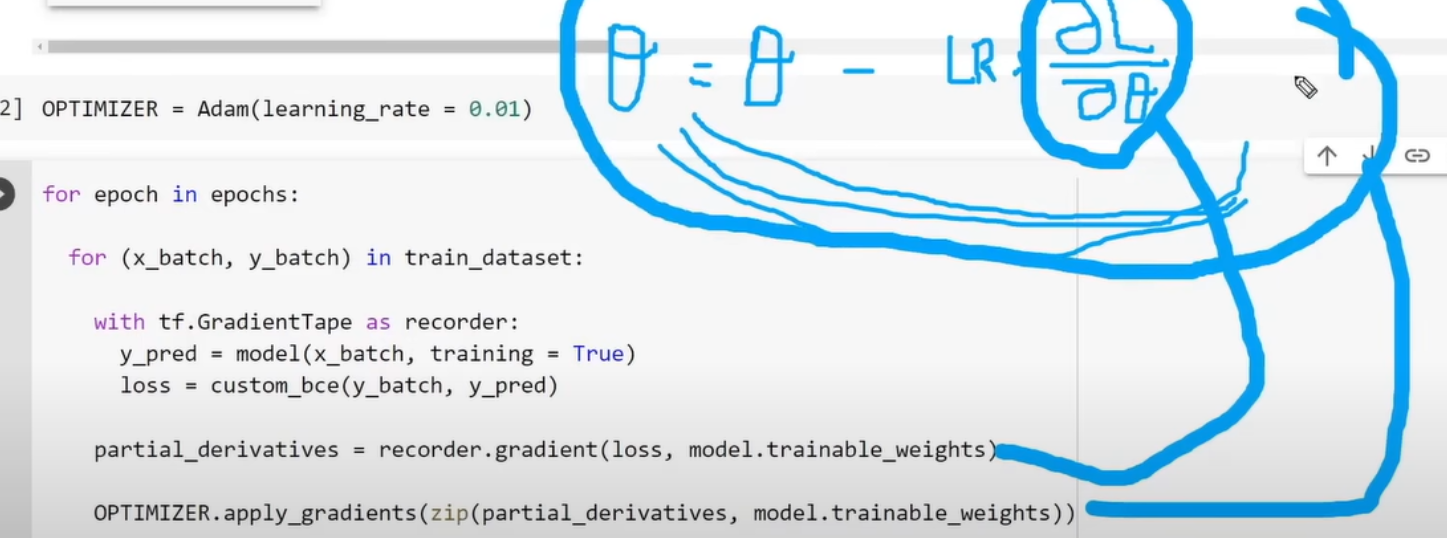

- recreating the fit method

- Creating directory for summary file writer

In [ ]:
CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
CUSTOM_TRAIN_DIR = './logs/' + CURRENT_TIME + '/custom/train'
CUSTOM_VAL_DIR = './logs/' + CURRENT_TIME + '/custom/validation'

custom_train_writer = tf.summary.create_file_writer(CUSTOM_TRAIN_DIR)
custom_validation_writer = tf.summary.create_file_writer(CUSTOM_VAL_DIR)

- setting values for function parameters

In [ ]:
OPTIMIZER = Adam(learning_rate = 0.01)
EPOCHS = 3
METRIC = BinaryAccuracy()
METRIC_VAL = BinaryAccuracy()

- Graph mode enabled for train block and validation block. This functions will later feed into the custom fit model

In [ ]:
@tf.function # # graph mode enabled
def training_block(x_batch, y_batch, loss_function):
  with tf.GradientTape() as recorder:
    y_pred = model(x_batch, training = True)
    loss = loss_function(y_batch, y_pred)
  # wandb.log({'loss': loss.numpy()})# easy integration of wandb into tensorboard
  partial_derivative = recorder.gradient(loss, model.trainable_weights) # partial derivative of loss for each and every weights
  OPTIMIZER.apply_gradients(zip(partial_derivative, model.trainable_weights))
  METRIC.update_state(y_batch, y_pred)
  return loss

@tf.function # graph mode enabled
def val_block(x_batch_val, y_batch_val, loss_function):
  #for (x_batch_val, y_batch_val) in val_dataset:
  y_pred_val = model(x_batch_val, training = False)
  loss_val = loss_function(y_batch_val, y_pred_val)
  METRIC_VAL.update_state(y_batch_val, y_pred_val)

    # print("Accuracy is for validation:", METRIC_VAL.result)
  # METRIC_VAL.reset_states()
    # print("Loss for validation dataset is {}".format(loss_val))
  return loss_val

In [ ]:
# for epoch in range(EPOCHS):
#   print("Training starts for epoch number {}".format(epoch))
#   for step, (x_batch, y_batch) in enumerate(train_dataset):
#     # this block in this for loop is expensive, so we will convert to graph mode
#     # with tf.GradientTape() as recorder:
#     #   y_pred = model(x_batch, training = True)
#     #   loss = custom_bce(y_batch, y_pred)
#     loss = training_block(x_batch, y_batch)

#     # partial_derivative = recorder.gradient(loss, model.trainable_weights) # partial derivative of loss for each and every weights
#     # OPTIMIZER.apply_gradients(zip(partial_derivative, model.trainable_weights))

#     # METRIC.update_state(y_batch, y_pred)
#   METRIC.reset_state()

#   #if step%300 == 0:
#   # after each epoch
#   print("Training loss: ",loss)
#   print("Accuracy is: ",METRIC.result())
#   # METRIC.reset_states()

#   # for validation dataset
#   # this block in this for loop is expensive, so we will convert to graph mode
#   for (x_batch_val, y_batch_val) in val_dataset:
#   #   y_pred_val = model(x_batch_val, training = False)
#   #   loss_val = custom_bce(y_batch_val, y_pred_val)
#     loss_val = val_block(x_batch_val, y_batch_val)

#   print("Validation loss: ",loss_val)
#   #   METRIC_VAL.update_state(y_batch_val, y_pred_val)
#   print("Accuracy is for validation:", METRIC_VAL.result())
#   METRIC_VAL.reset_state()
#   # print("Loss for validation dataset is {}".format(loss_val))

- Our custom fit, which replace the tf.model.fit()

In [ ]:
def custom_fit(model, loss_function, train_dataset, val_dataset, OPTIMIZER, EPOCHS, METRIC, MATRIC_VAL):

  for epoch in range(EPOCHS):
    print("Training starts for epoch number {}".format(epoch))
    for step, (x_batch, y_batch) in enumerate(train_dataset):
      loss = training_block(x_batch, y_batch, loss_function)
    print("Training loss:", loss)
    print("The training accuracy is", METRIC.result())

    # first run Visualization using tensorboard callblock to set the directory -  (METRIC_DIR)
    with custom_train_writer.as_default():
      tf.summary.scalar('Training Loss', data = loss, step = epoch)
    with custom_train_writer.as_default():
      tf.summary.scalar('Training Accuracy', data = METRIC.result(), step = epoch)
    METRIC.reset_state()

    for (x_batch_val, y_batch_val) in val_dataset:
      loss_val = val_block(x_batch_val, y_batch_val, loss_function)

    print("Validation loss: ",loss_val)
    print("Accuracy is for validation:", METRIC_VAL.result())

    # for tensorbord call back
    with custom_validation_writer.as_default():
      tf.summary.scalar('Validation Loss', data = loss_val, step = epoch)
    with custom_train_writer.as_default():
      tf.summary.scalar('Validation Accuracy', data = METRIC_VAL.result(), step = epoch)

    METRIC_VAL.reset_state()
  print("Completed!!!")

- Calling the custom fit model

In [ ]:
custom_fit(model, custom_bce, train_dataset, val_dataset, OPTIMIZER, EPOCHS, METRIC, METRIC_VAL)

In [ ]:
# tensorboard --logdir='./logs'

In [ ]:
## remove all the information from the log
!rm -rf ./logs/


# [Data Logging](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger)

# Hyper Parameter Tuning

In [ ]:
def model_tuning(hparams):
  IMG_SIZE = 224
  # droupout_rate = 0.3
  # regularization_rate = 0.01
  model = tf.keras.Sequential([
    InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(hparams[HP_REGULARIZATION_RATE])),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    Dropout(rate = hparams[HP_DROPOUT]), #

    Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(hparams[HP_REGULARIZATION_RATE])),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(hparams[HP_NUM_UNITS_1], activation = "relu", kernel_regularizer=L2(hparams[HP_REGULARIZATION_RATE])),
    BatchNormalization(),
    Dropout(rate = hparams[HP_DROPOUT]),
    Dense(hparams[HP_NUM_UNITS_2], activation = "relu", kernel_regularizer=L2(hparams[HP_REGULARIZATION_RATE])),
    BatchNormalization(),
    Dense(1, activation = "sigmoid"),# binary classification



  ])

  # model.summary()

  model.compile(optimizer= Adam(learning_rate = hparams[HP_LEARNING_RATE]),
                loss = BinaryCrossentropy(),
                metrics = ['accuracy']
              )
  model.fit(val_dataset, epochs = 1)
  _, accuracy = model.evaluate(val_dataset)
  return accuracy


## Grid Search

In [ ]:
HP_NUM_UNITS_1 = hp.HParam('num_units_1', hp.Discrete([16, 32,64,128]))
HP_NUM_UNITS_2 = hp.HParam('num_units_2', hp.Discrete([16, 32,64,128]))
HP_DROPOUT= hp.HParam('dropout', hp.Discrete([0.1, 0.2, 0.3]))
HP_REGULARIZATION_RATE = hp.HParam('regularization_rate', hp.Discrete([0.001, 0.01, 0.1]))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([1e-4,1e-3]))

In [ ]:
run_number = 0
for num_units_1 in HP_NUM_UNITS_1.domain.values:
  for num_units_2 in HP_NUM_UNITS_2.domain.values:
    for dropout_rate in HP_DROPOUT.domain.values:
      for regularization_rate in HP_REGULARIZATION_RATE.domain.values:
        for learning_rate in HP_LEARNING_RATE.domain.values:

          hparams = {
              HP_NUM_UNITS_1: num_units_1,
              HP_NUM_UNITS_2: num_units_2,
              HP_DROPOUT: dropout_rate,
              HP_REGULARIZATION_RATE: regularization_rate,
              HP_LEARNING_RATE: learning_rate,

          }
          # for each run, select best hyperparams, create file to write
          file_writer = tf.summary.create_file_writer('logs/hparams-' + str(run_number))

          # write in the file
          with file_writer.as_default():
              hp.hparams(hparams)
              # function calling
              accuracy = model_tuning(hparams)
              tf.summary.scalar('accuracy', accuracy, step = 0)
          print("For the run {}, hparams num_units_1:{}, num_units_2:{}, dropout:{}, regularization_rate:{}, learning_rate:{}".format(run_number, hparams[HP_NUM_UNITS_1], hparams[HP_NUM_UNITS_2],
                                                             hparams[HP_DROPOUT], hparams[HP_REGULARIZATION_RATE],
                                                             hparams[HP_LEARNING_RATE]))

          run_number += 1

## Hyperparameter Tuning using WANDB

- [Sweeps](https://docs.wandb.ai/guides/sweeps/)
- [Sweep Configuration Keys](https://docs.wandb.ai/guides/sweeps/sweep-config-keys/)
- [sweep walkthrough](https://docs.wandb.ai/guides/sweeps/walkthrough/)

- defining the search space

In [ ]:
CONFIGURATION = {
  "LEARNING_RATE": 0.001,
  "N_EPOCHS": 3,
  "BATCH_SIZE": 128,
  "DROPOUT_RATE": 0.0,
  "IM_SIZE": 224,
  "REGULARIZATION_RATE": 0.0,
  "N_FILTERS": 6,
  "KERNEL_SIZE": 3,
  "N_STRIDES": 1,
  "POOL_SIZE": 2,
  "N_DENSE_1": 100,
  "N_DENSE_2": 10,

}
# CONFIGURATION = wandb.config

In [ ]:
sweep_configuration = {
    "name": "Maleria-prediction-sweep",
    "method": "random",
    "metric": {"goal": "maximize", "name": "accuracy"},
    "parameters": {
        "IM_SIZE": {
        "value" : 224,
    },

    "N_EPOCHS": {
        "value" : 1,
    },

    "KERNEL_SIZE": {
        "value" : 3,
    },

    "N_STRIDES": {
        "value" : 1,
    },

    "POOL_SIZE": {
        "value" : 224,
    },

    "N_FILTERS" : {
        "value" : 6,
    },

    "N_DENSE_1" : {
      "values" : [16, 32, 64, 128]
    },

    "N_DENSE_2" : {
      "values" : [16, 32, 64, 128]
    },

    "DROPOUT_RATE":{
      "min": 0.1,
      "max": 0.4
    },

    "REGULARIZATION_RATE" :{
      "distribution": "uniform",
      "min": 0.001,
      "max": 0.1
    },

    "LEARNING_RATE" :{
      "distribution": "uniform",
      "min": 1e-4,
      "max": 1e-2
    }
    }
}

# HP_NUM_UNITS_1 = hp.HParam('num_units_1', hp.Discrete([16, 32,64,128]))
# HP_NUM_UNITS_2 = hp.HParam('num_units_2', hp.Discrete([16, 32,64,128]))
# HP_DROPOUT= hp.HParam('dropout', hp.Discrete([0.1, 0.2, 0.3]))
# HP_REGULARIZATION_RATE = hp.HParam('regularization_rate', hp.Discrete([0.001, 0.01, 0.1]))
# HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([1e-4,1e-3]))
sweep_id = wandb.sweep(sweep=sweep_configuration)

- defining the training function

In [ ]:
def model_tuning(hparams):
  IMG_SIZE = 224
  # droupout_rate = 0.3
  # regularization_rate = 0.01
  model = tf.keras.Sequential([
    InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(hparams[HP_REGULARIZATION_RATE])),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    Dropout(rate = hparams[HP_DROPOUT]), #

    Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(hparams[HP_REGULARIZATION_RATE])),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(hparams[HP_NUM_UNITS_1], activation = "relu", kernel_regularizer=L2(hparams[HP_REGULARIZATION_RATE])),
    BatchNormalization(),
    Dropout(rate = hparams[HP_DROPOUT]),
    Dense(hparams[HP_NUM_UNITS_2], activation = "relu", kernel_regularizer=L2(hparams[HP_REGULARIZATION_RATE])),
    BatchNormalization(),
    Dense(1, activation = "sigmoid"),# binary classification



  ])

  # model.summary()

  # model.compile(optimizer= Adam(learning_rate = hparams[HP_LEARNING_RATE]),
  #               loss = BinaryCrossentropy(),
  #               metrics = ['accuracy']
  #             )
  # model.fit(val_dataset, epochs = 1)
  # _, accuracy = model.evaluate(val_dataset)
  return model


In [ ]:
def train():
    with wandb.init(project="Malaria-Detection", entity="monochandan-universit-t-trier", ) as run:
        config = wandb.config
        model = model_tuning(config)
        model.compile(
              optimizer= Adam(
                  learning_rate = config['LEARNING_RATE']),
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )
        model.fit(val_dataset, epochs=config.N_EPOCHS, callbacks = [WandbCallback()])
        #wandb.log({"loss": loss, "epoch": epoch})

count = 5 # number of runs to execute
wandb.agent(sweep_id, function=train, count=count)

## [Tensorboard](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard)

### [WANDB x TENSORBOARD](https://docs.wandb.ai/guides/integrations/tensorboard/)

In [ ]:

import wandb

# Start a wandb run with `sync_tensorboard=True`
# wandb.init(project="Maleria-Dignosis", sync_tensorboard=True)

# Your training code using TensorBoard
...

# [Optional]Finish the wandb run to upload the tensorboard logs to W&B (if running in Notebook)
wandb.tensorboard.patch(root_logdir='./logs/') # when using several log directories, because we have CUSTOME_TRAIN_DIR, CUSTOM_VAL_DIR

# wandb.init()
wandb.init(project="Maleria-Dignosis", entity = "monochandan-universit-t-trier", sync_tensorboard=True)
# wandb.tensorboard.patch(root_logdir="<logging_directory>")
# wandb.init()

# # Finish the wandb run to upload the tensorboard logs to W&B (if running in Notebook)
# wandb.finish()
# wandb.finish()

In [ ]:
wandb.config = {
  "LEARNING_RATE": 0.001,
  "N_EPOCHS": 3,
  "BATCH_SIZE": 128,
  "DROPOUT_RATE": 0.0,
  "IM_SIZE": 224,
  "REGULARIZATION_RATE": 0.0,
  "N_FILTERS": 6,
  "KERNEL_SIZE": 3,
  "N_STRIDES": 1,
  "POOL_SIZE": 2,
  "N_DENSE_1": 100,
  "N_DENSE_2": 10,

}
CONFIGURATION = wandb.config

In [ ]:
OPTIMIZER = Adam(learning_rate = 0.01)
EPOCHS = CONFIGURATION['N_EPOCHS']
METRIC = BinaryAccuracy()
METRIC_VAL = BinaryAccuracy()

In [ ]:
CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
CUSTOM_TRAIN_DIR = './logs/' + CURRENT_TIME + '/custom/train'
CUSTOM_VAL_DIR = './logs/' + CURRENT_TIME + '/custom/validation'

custom_train_writer = tf.summary.create_file_writer(CUSTOM_TRAIN_DIR)
custom_validation_writer = tf.summary.create_file_writer(CUSTOM_VAL_DIR)

In [ ]:
@tf.function # # graph mode enabled
def training_block(x_batch, y_batch, loss_function):
  with tf.GradientTape() as recorder:
    y_pred = model(x_batch, training = True)
    loss = loss_function(y_batch, y_pred)
  # wandb.log({'loss': loss.numpy()})# easy integration of wandb into tensorboard
  partial_derivative = recorder.gradient(loss, model.trainable_weights) # partial derivative of loss for each and every weights
  OPTIMIZER.apply_gradients(zip(partial_derivative, model.trainable_weights))
  METRIC.update_state(y_batch, y_pred)
  return loss

@tf.function # graph mode enabled
def val_block(x_batch_val, y_batch_val, loss_function):
  #for (x_batch_val, y_batch_val) in val_dataset:
  y_pred_val = model(x_batch_val, training = False)
  loss_val = loss_function(y_batch_val, y_pred_val)
  METRIC_VAL.update_state(y_batch_val, y_pred_val)

    # print("Accuracy is for validation:", METRIC_VAL.result)
  # METRIC_VAL.reset_states()
    # print("Loss for validation dataset is {}".format(loss_val))
  return loss_val

In [ ]:
def custom_fit(model, loss_function, train_dataset, val_dataset, OPTIMIZER, EPOCHS, METRIC, MATRIC_VAL):

  for epoch in range(EPOCHS):
    print("Training starts for epoch number {}".format(epoch))
    for step, (x_batch, y_batch) in enumerate(train_dataset):
      loss = training_block(x_batch, y_batch, loss_function)
    print("Training loss:", loss)
    print("The training accuracy is", METRIC.result())

    # first run Visualization using tensorboard callblock to set the directory -  (METRIC_DIR)
    with custom_train_writer.as_default():
      tf.summary.scalar('Training Loss', data = loss, step = epoch)
    with custom_train_writer.as_default():
      tf.summary.scalar('Training Accuracy', data = METRIC.result(), step = epoch)
    METRIC.reset_state()

    for (x_batch_val, y_batch_val) in val_dataset:
      loss_val = val_block(x_batch_val, y_batch_val, loss_function)

    print("Validation loss: ",loss_val)
    print("Accuracy is for validation:", METRIC_VAL.result())

    # for tensorbord call back
    with custom_validation_writer.as_default():
      tf.summary.scalar('Validation Loss', data = loss_val, step = epoch)
    with custom_train_writer.as_default():
      tf.summary.scalar('Validation Accuracy', data = METRIC_VAL.result(), step = epoch)

    METRIC_VAL.reset_state()
  print("Completed!!!")

In [ ]:
custom_fit(model, custom_bce, train_dataset, val_dataset, OPTIMIZER, EPOCHS, METRIC, METRIC_VAL)

In [ ]:
%load_ext tensorboard

In [ ]:
tensorboard --logdir=logs

## [visualize and explore different aspects of model to reduce the complexity](https://docs.wandb.ai/guides/integrations/tensorboard/)

In [ ]:
CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
METRIC_DIR = './logs/' + CURRENT_TIME + '/metrics'
train_writer = tf.summary.create_file_writer(METRIC_DIR)

### Profiling and visualization [15:52]

- Profile the batch(es) to sample compute characteristics.
- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [ ]:
LOG_DIR = "./logs/"+ CURRENT_TIME
print(LOG_DIR)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR, histogram_freq=1, profile_batch = '100, 132')

In [ ]:
%load_ext tensorboard

In [ ]:
tensorboard --logdir='./logs'

## training with the best selected params

In [ ]:
IMG_SIZE = 224
droupout_rate = 0.3
regularization_rate = 0.01
model = tf.keras.Sequential([
  InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  Conv2D(filters = 6, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),
  Dropout(droupout_rate), #

  Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same', kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  MaxPool2D(pool_size = 2, strides = 2),

  Flatten(),

  Dense(1000, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dropout(droupout_rate),
  Dense(10, activation = "relu", kernel_regularizer=L2(0.01)),
  BatchNormalization(),
  Dense(1, activation = "sigmoid"),# binary classification



])

model.summary()


In [ ]:
model_sub_classed.compile(optimizer= Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = ['accuracy']
            )
# loss = Loss
history = model_sub_classed.fit(train_dataset, epochs = 2, validation_data = val_dataset, verbose = 1, callbacks=[tensorboard_callback]) #LossCallback(),csv_callback

# Weights and biases

- https://docs.wandb.ai/quickstart/

- https://docs.wandb.ai/ref/ (python)

- https://docs.wandb.ai/guides/integrations/ (guides and integrations of diff models and libraries)



- install and login

In [ ]:
!pip install wandb

In [ ]:
!wandb login

- new project

In [ ]:
# This script needs these libraries to be installed:
#   tensorflow, numpy

import wandb
from wandb.integration.keras import WandbCallback, WandbMetricsLogger, WandbModelCheckpoint

# import random
# import numpy as np
# import tensorflow as tf

- https://wandb.ai/home
- https://docs.wandb.ai/guides/integrations/keras/ (wandbcallback)

In [ ]:
wandb.init(project="Malaria-Detection", entity = "monochandan-universit-t-trier")

In [ ]:
wandb.run

In [ ]:
wandb.config = {
  "LEARNING_RATE": 0.001,
  "N_EPOCHS": 3,
  "BATCH_SIZE": 128,
  "DROPOUT_RATE": 0.0,
  "IM_SIZE": 224,
  "REGULARIZATION_RATE": 0.0,
  "N_FILTERS": 6,
  "KERNEL_SIZE": 3,
  "N_STRIDES": 1,
  "POOL_SIZE": 2,
  "N_DENSE_1": 100,
  "N_DENSE_2": 10,

}
CONFIGURATION = wandb.config

In [ ]:
IMG_SIZE = CONFIGURATION['IM_SIZE']
DROPOUT_RATE = CONFIGURATION['DROPOUT_RATE']
REGULARIZATION_RATE = CONFIGURATION['REGULARIZATION_RATE']
N_FILTERS = CONFIGURATION['N_FILTERS']
KERNEL_SIZE = CONFIGURATION['KERNEL_SIZE']
N_STRIDES = CONFIGURATION['N_STRIDES']
POOL_SIZE = CONFIGURATION['POOL_SIZE']

model = tf.keras.Sequential([
  InputLayer(shape= (IMG_SIZE, IMG_SIZE, 3)),
  Conv2D(filters = N_FILTERS, kernel_size = KERNEL_SIZE, strides = N_STRIDES, activation = 'relu', padding = 'same', kernel_regularizer=L2(REGULARIZATION_RATE)),
  BatchNormalization(),
  MaxPool2D(pool_size = POOL_SIZE, strides = N_STRIDES),
  Dropout(DROPOUT_RATE), #

  Conv2D(filters = N_FILTERS*2 + 4, kernel_size = KERNEL_SIZE, strides = N_STRIDES, activation = 'relu', padding = 'same', kernel_regularizer=L2(REGULARIZATION_RATE)),
  BatchNormalization(),
  MaxPool2D(pool_size = POOL_SIZE, strides = N_STRIDES),

  Flatten(),

  Dense(CONFIGURATION['N_DENSE_1'], activation = "relu", kernel_regularizer=L2(REGULARIZATION_RATE)),
  BatchNormalization(),
  Dropout(DROPOUT_RATE),
  Dense(CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer=L2(REGULARIZATION_RATE)),
  BatchNormalization(),
  Dense(1, activation = "sigmoid"),# binary classification



])

model.summary()


In [ ]:
metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]

In [ ]:
model.compile(optimizer= Adam(learning_rate =CONFIGURATION['learning_rate'] ),
              loss = BinaryCrossentropy(),
              metrics = metrics
            )
LABELS = ['Parasitized', 'Uninfected']

In [ ]:
history = model.fit(train_dataset,
                    epochs = CONFIGURATION.N_EPOCHS,
                    validation_data = val_dataset,
                    verbose = 1,
                    callbacks=[WandbCallback(validation_data = val_dataset,
                                             labels = LABELS,
                                             data_type = image,), LogImageCallbackWandB()]) # WANDB callback section for imagecallback
                                             #WandbMetricsLogger(), WandbModelCheckpoint(),

In [ ]:
wandb.finish()